## Starting Off:

Imaigne you are tyring to determine the price to sell your house for. What featueres do you think woiuld be important in determining that price?

# Data Preparation and Feature Engineering 

## Data Preparation

This consists of cleaning up and modifying your current variables to make them more usable within the model.  This could include:

- Changing the data type to something usable. 
    - *Converting a string '3' to float 3*
    - *Creating dummy variables*
    - *Converting a time date stamp to a usable format
- Removing outliers
- Handling missing data
    - Removing observations with missing data points.
    - Substituting in another value for the missing value.
    

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 300)

In [2]:
df = pd.read_csv('kc_house_data.csv', index_col='id')


In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df['date'].head()

id
7129300520    20141013T000000
6414100192    20141209T000000
5631500400    20150225T000000
2487200875    20141209T000000
1954400510    20150218T000000
Name: date, dtype: object

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df['date'].head()

id
7129300520   2014-10-13
6414100192   2014-12-09
5631500400   2015-02-25
2487200875   2014-12-09
1954400510   2015-02-18
Name: date, dtype: datetime64[ns]

Previously we've dealt with the date of year built by subtracting the year this data was released to create a column showing how many years old the data is.  

In [9]:
df['yr_old']=2017 - df['yr_built']


In [10]:
df['years_since_sold'] = df['date'].map(lambda x: 2017-x.year )

In [11]:
df['years_since_sold'].head()

id
7129300520    3
6414100192    3
5631500400    2
2487200875    3
1954400510    2
Name: years_since_sold, dtype: int64

## Removing Outliers

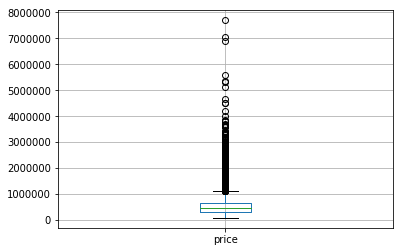

In [12]:
df.boxplot(['price'])

In [13]:
df = df[df['price']<4000000]

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

## Handling Missing Data:
    
Imagine that the 'grade' value was missing from 15% of your data. You don't want to drop those observations becasue  it is a significant chunk of your data.  Also you did some data exploration and you realize that the 'grade' tends to be missing more for smaller  and  older houses.  

**How would you go about filling in the missing grade values?**

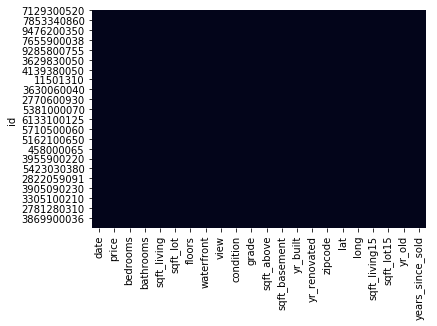

In [14]:
sns.heatmap(df.isnull(), cbar=False)

## Capturing Non-linear relationships



We can model non-linear relationships in a linear regression model by creating non-linear transformations of the data.

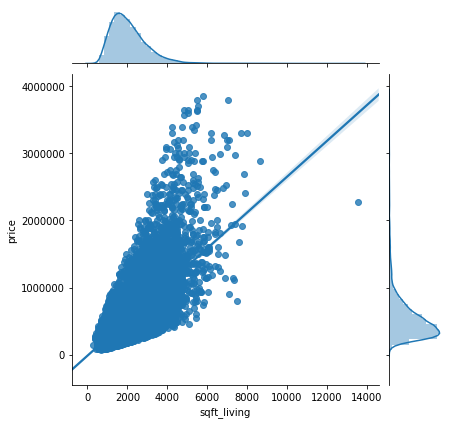

In [15]:
sns.jointplot(x='sqft_living', y='price', data=df, kind="reg")

In [16]:
slr_model = sm.OLS(endog=df['price'], exog=sm.add_constant(df['sqft_living'])).fit()

slr_model.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                 2.010e+04
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:49:00   Log-Likelihood:            -2.9916e+05
No. Observations:               21601   AIC:                         5.983e+05
Df Residuals:                   21599   BIC:                         5.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.642e+04   4260.992     -3.853      0.000   -2.48e+04   -8066.561
sqft_living   266.7213      1.881    141.790      0.000     263.034     270.408
==============================================================================
Omnibus:                    11213.935   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148960.820
Skew:                           2.189   Prob(JB):                         0.00
Kurtosis:                      15.097   Cond. No.                     5.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
def checkresiduals(df, target, sm_model):
    # checking for our model - Homoscedasticity,  Independence of residuals
    pred_val = sm_model.fittedvalues.copy()
    true_val = df[target].values.copy()
    residual = true_val - pred_val

    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
#     fig, ax = plt.subplots(figsize=(8, 6))
    ax1.hist(residual, density=True, bins=30)
    ax2.scatter(df[target],residual)
    ax2.set_title('Residual Scatterplot')
    plt.show()

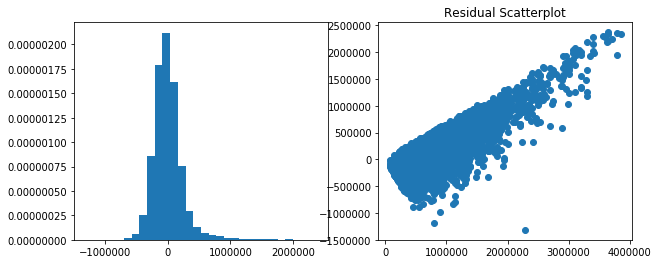

In [18]:
checkresiduals(df, 'price', slr_model)

In [19]:
df['price_log'] = np.log(df['price'])


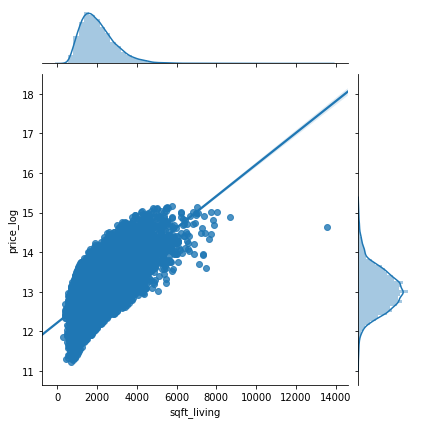

In [20]:
sns.jointplot(x='sqft_living', y='price_log', data=df, kind="reg")

In [21]:
price_log_model = sm.OLS(endog=df['price_log'], exog=sm.add_constant(df['sqft_living'])).fit()
price_log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                 1.976e+04
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:54:39   Log-Likelihood:                -9660.3
No. Observations:               21601   AIC:                         1.932e+04
Df Residuals:                   21599   BIC:                         1.934e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2164      0.006   1896.305      0.000      12.204      12.229
sqft_living     0.0004   2.84e-06    140.569      0.000       0.000       0.000
==============================================================================
Omnibus:                        3.166   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.205   Jarque-Bera (JB):                3.187
Skew:                           0.027   Prob(JB):                        0.203
Kurtosis:                       2.975   Cond. No.                     5.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

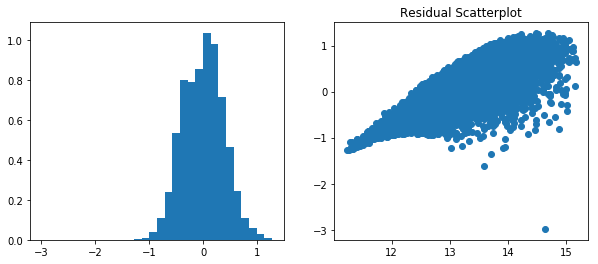

In [22]:
checkresiduals(df, 'price_log', price_log_model)

In [23]:
df['sqft_living_log'] = np.log(df['sqft_living'])


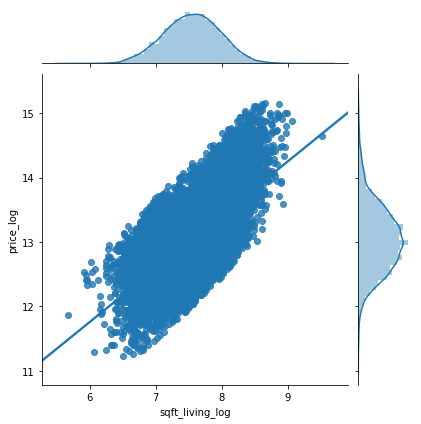

In [24]:
sns.jointplot(x='sqft_living_log', y='price_log', data=df, kind="reg")

In [25]:
log_log_model = sm.OLS(endog=df['price_log'], exog=sm.add_constant(df['sqft_living_log'])).fit()
log_log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                 1.781e+04
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:55:54   Log-Likelihood:                -10183.
No. Observations:               21601   AIC:                         2.037e+04
Df Residuals:                   21599   BIC:                         2.039e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.7707      0.047    143.738      0.000       6.678       6.863
sqft_living_log     0.8313      0.006    133.439      0.000       0.819       0.843
==============================================================================
Omnibus:                      124.888   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.724
Skew:                           0.132   Prob(JB):                     5.49e-25
Kurtosis:                       2.767   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

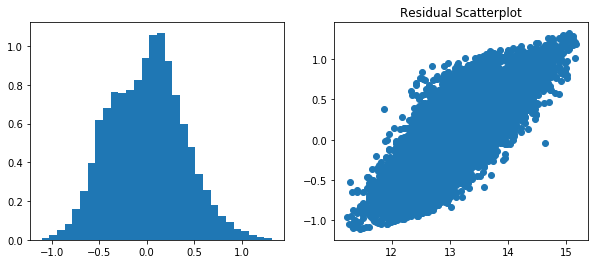

In [26]:
checkresiduals(df, 'price_log', log_log_model)

In [27]:
list(df.columns)

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'yr_old',
 'years_since_sold',
 'price_log',
 'sqft_living_log']

In [28]:
target = df['price_log']
features = ['bedrooms',
 'bathrooms',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15',
 'yr_old',
 'years_since_sold',
 'sqft_living_log']

In [29]:
df[features].describe()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,yr_old,years_since_sold,sqft_living_log
count,21601.000000,21601.000000,2.160100e+04,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000
mean,3.369890,2.112738,1.509942e+04,1.494051,0.007314,0.233091,3.409564,7.654368,1785.776492,290.565483,1985.516365,12763.592982,46.004028,2.677006,7.549513
std,0.929321,0.764982,4.143021e+04,0.539975,0.085213,0.763623,0.650839,1.170895,820.343853,439.816924,684.039491,27310.235947,29.370824,0.467631,0.423471
min,0.000000,0.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,399.000000,651.000000,2.000000,2.000000,5.669881
25%,3.000000,1.750000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1490.000000,5100.000000,20.000000,2.000000,7.258412
50%,3.000000,2.250000,7.615000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000,42.000000,3.000000,7.554859
75%,4.000000,2.500000,1.066600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,2360.000000,10080.000000,66.000000,3.000000,7.843849
max,33.000000,8.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,6210.000000,871200.000000,117.000000,3.000000,9.513404


In [30]:
all_features_model = sm.OLS(endog=df['price_log'], exog=sm.add_constant(df[features]) ).fit()

all_features_model.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2719.
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:57:13   Log-Likelihood:                -5216.2
No. Observations:               21601   AIC:                         1.046e+04
Df Residuals:                   21585   BIC:                         1.059e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.1278      0.122     74.810      0.000       8.889       9.367
bedrooms            -0.0318      0.003    -10.558      0.000      -0.038      -0.026
bathrooms            0.0757      0.005     15.253      0.000       0.066       0.085
sqft_lot          2.327e-07   7.32e-08      3.181      0.001    8.93e-08    3.76e-07
floors               0.1198      0.005     22.141      0.000       0.109       0.130
waterfront           0.3585      0.027     13.331      0.000       0.306       0.411
view                 0.0399      0.003     12.255      0.000       0.033       0.046
condition            0.0399      0.004     11.315      0.000       0.033       0.047
grade                0.2067      0.003     64.329      0.000       0.200       0.213
sqft_above        2.169e-05   8.92e-06      2.431      0.015     4.2e-06    3.92e-05
sqft_basement        0.0001   1.02e-05     10.361      0.000    8.55e-05       0.000
sqft_living15        0.0001   5.17e-06     20.855      0.000    9.77e-05       0.000
sqft_lot15       -5.189e-07   1.12e-07     -4.644      0.000   -7.38e-07      -3e-07
yr_old               0.0057   9.66e-05     58.607      0.000       0.005       0.006
years_since_sold    -0.0420      0.004     -9.353      0.000      -0.051      -0.033
sqft_living_log      0.2024      0.019     10.914      0.000       0.166       0.239
==============================================================================
Omnibus:                       66.191   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.883
Skew:                          -0.093   Prob(JB):                     9.05e-17
Kurtosis:                       3.218   Cond. No.                     2.98e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

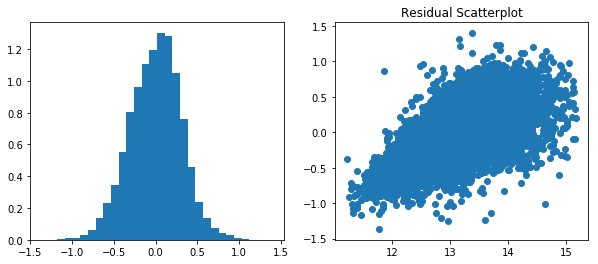

In [32]:
checkresiduals(df, 'price_log', all_features_model)

In [33]:
scaler = StandardScaler()
scaler.fit(df[features])
scaled_features = scaler.transform(df[features])

scaled_features_df = pd.DataFrame(scaled_features, columns=features, index=df.index)
scaled_features_df.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,yr_old,years_since_sold,sqft_living_log
id,,,,,,,,,,,,,,,
7129300520,-0.398031,-1.454627,-0.228086,-0.914973,-0.085839,-0.305251,-0.629301,-0.558874,-0.738459,-0.660666,-0.943705,-0.260480,0.544634,0.690719,-1.124646
6414100192,-0.398031,0.179436,-0.189659,0.937007,-0.085839,-0.305251,-0.629301,-0.558874,0.468380,0.248824,-0.432027,-0.187648,0.680826,0.690719,0.713520
5631500400,-1.474110,-1.454627,-0.123087,-0.914973,-0.085839,-0.305251,-0.629301,-1.412941,-1.238261,-0.660666,1.073769,-0.172159,1.293694,-1.447767,-2.132718
2487200875,0.678048,1.159874,-0.243775,-0.914973,-0.085839,-0.305251,2.443725,-0.558874,-0.896933,1.408424,-0.914466,-0.284281,0.204152,0.690719,0.073646
1954400510,-0.398031,-0.147377,-0.169431,-0.914973,-0.085839,-0.305251,-0.629301,0.295193,-0.128945,-0.660666,-0.271213,-0.192628,-0.544908,-1.447767,-0.290380


In [34]:
scaled_features_model = sm.OLS(endog=df['price_log'], exog=sm.add_constant(scaled_features_df)).fit()

scaled_features_model.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2719.
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:01:27   Log-Likelihood:                -5216.2
No. Observations:               21601   AIC:                         1.046e+04
Df Residuals:                   21585   BIC:                         1.059e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.0465      0.002   6222.034      0.000      13.042      13.051
bedrooms            -0.0295      0.003    -10.558      0.000      -0.035      -0.024
bathrooms            0.0579      0.004     15.253      0.000       0.050       0.065
sqft_lot             0.0096      0.003      3.181      0.001       0.004       0.016
floors               0.0647      0.003     22.141      0.000       0.059       0.070
waterfront           0.0305      0.002     13.331      0.000       0.026       0.035
view                 0.0304      0.002     12.255      0.000       0.026       0.035
condition            0.0260      0.002     11.315      0.000       0.021       0.030
grade                0.2420      0.004     64.329      0.000       0.235       0.249
sqft_above           0.0178      0.007      2.431      0.015       0.003       0.032
sqft_basement        0.0464      0.004     10.361      0.000       0.038       0.055
sqft_living15        0.0738      0.004     20.855      0.000       0.067       0.081
sqft_lot15          -0.0142      0.003     -4.644      0.000      -0.020      -0.008
yr_old               0.1662      0.003     58.607      0.000       0.161       0.172
years_since_sold    -0.0197      0.002     -9.353      0.000      -0.024      -0.016
sqft_living_log      0.0857      0.008     10.914      0.000       0.070       0.101
==============================================================================
Omnibus:                       66.191   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.883
Skew:                          -0.093   Prob(JB):                     9.05e-17
Kurtosis:                       3.218   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

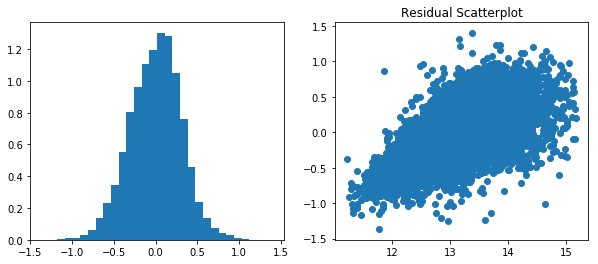

In [35]:
checkresiduals(df, 'price_log', scaled_features_model)

https://stats.stackexchange.com/questions/260942/transforming-back-after-a-log-transformation

## Polynomial Features 
<img src='noisy-sine-third-order-polynomial.png' width=500 />


In [36]:
poly = PolynomialFeatures(2)
poly_data = poly.fit_transform(df[features])
poly_columns = poly.get_feature_names(df[features].columns)
poly_features = pd.DataFrame(poly_data, columns=poly_columns, index=df.index)
scaler.fit(poly_features)
scaled_features = scaler.transform(poly_features)

poly_scaled_features = pd.DataFrame(scaled_features, columns=poly_columns, index=df.index)
poly_scaled_features.head(15)

,1,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,yr_old,years_since_sold,sqft_living_log,bedrooms^2,bedrooms bathrooms,bedrooms sqft_lot,bedrooms floors,bedrooms waterfront,bedrooms view,bedrooms condition,bedrooms grade,bedrooms sqft_above,bedrooms sqft_basement,bedrooms sqft_living15,bedrooms sqft_lot15,bedrooms yr_old,bedrooms years_since_sold,bedrooms sqft_living_log,bathrooms^2,bathrooms sqft_lot,bathrooms floors,bathrooms waterfront,bathrooms view,bathrooms condition,bathrooms grade,bathrooms sqft_above,bathrooms sqft_basement,bathrooms sqft_living15,bathrooms sqft_lot15,bathrooms yr_old,bathrooms years_since_sold,bathrooms sqft_living_log,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,sqft_lot view,sqft_lot condition,sqft_lot grade,sqft_lot sqft_above,sqft_lot sqft_basement,sqft_lot sqft_living15,sqft_lot sqft_lot15,sqft_lot yr_old,sqft_lot years_since_sold,sqft_lot sqft_living_log,floors^2,floors waterfront,floors view,floors condition,floors grade,floors sqft_above,floors sqft_basement,floors sqft_living15,floors sqft_lot15,floors yr_old,floors years_since_sold,floors sqft_living_log,waterfront^2,waterfront view,waterfront condition,waterfront grade,waterfront sqft_above,waterfront sqft_basement,waterfront sqft_living15,waterfront sqft_lot15,waterfront yr_old,waterfront years_since_sold,waterfront sqft_living_log,view^2,view condition,view grade,view sqft_above,view sqft_basement,view sqft_living15,view sqft_lot15,view yr_old,view years_since_sold,view sqft_living_log,condition^2,condition grade,condition sqft_above,condition sqft_basement,condition sqft_living15,condition sqft_lot15,condition yr_old,condition years_since_sold,condition sqft_living_log,grade^2,grade sqft_above,grade sqft_basement,grade sqft_living15,grade sqft_lot15,grade yr_old,grade years_since_sold,grade sqft_living_log,sqft_above^2,sqft_above sqft_basement,sqft_above sqft_living15,sqft_above sqft_lot15,sqft_above yr_old,sqft_above years_since_sold,sqft_above sqft_living_log,sqft_basement^2,sqft_basement sqft_living15,sqft_basement sqft_lot15,sqft_basement yr_old,sqft_basement years_since_sold,sqft_basement sqft_living_log,sqft_living15^2,sqft_living15 sqft_lot15,sqft_living15 yr_old,sqft_living15 years_since_sold,sqft_living15 sqft_living_log,sqft_lot15^2,sqft_lot15 yr_old,sqft_lot15 years_since_sold,sqft_lot15 sqft_living_log,yr_old^2,yr_old years_since_sold,yr_old sqft_living_log,years_since_sold^2,years_since_sold sqft_living_log,sqft_living_log^2
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,0.0,-0.398031,-1.454627,-0.228086,-0.914973,-0.085839,-0.305251,-0.629301,-0.558874,-0.738459,-0.660666,-0.943705,-0.260480,0.544634,0.690719,-1.124646,-0.323851,-1.070678,-0.239099,-0.856674,-0.081751,-0.292313,-0.624339,-0.554250,-0.683446,-0.589582,-0.802592,-0.279835,0.330234,-0.008484,-0.558387,-1.117265,-0.255047,-1.142559,-0.080406,-0.281133,-1.499464,-1.201850,-0.890304,-0.558169,-1.078850,-0.295706,-0.409796,-1.147559,-1.391529,-0.063647,-0.243159,-0.042917,-0.09438,-0.240534,-0.231534,-0.216677,-0.174895,-0.264157,-0.086927,-0.132432,-0.216226,-0.235482,-0.837147,-0.081245,-0.282576,-1.134211,-0.888004,-0.827365,-0.609390,-0.983824,-0.286774,0.024352,-0.613732,-0.986653,-0.085839,-0.084935,-0.084001,-0.084233,-0.078143,-0.05828,-0.082009,-0.05997,-0.07676,-0.084608,-0.085673,-0.261544,-0.298033,-0.296862,-0.268954,-0.210884,-0.284832,-0.121115,-0.264174,-0.299876,-0.303537,-0.621922,-0.864952,-0.896137,-0.635015,-1.074796,-0.288836,0.188153,-0.057928,-0.895730,-0.574302,-0.682252,-0.618988,-0.815830,-0.263655,0.471872,0.101545,-0.740247,-0.614407,-0.501090,-0.722533,-0.242576,0.026207,-0.520069,-0.762159,-0.457595,-0.550440,-0.187370,-0.581156,-0.644856,-0.644665,-0.789231,-0.300910,-0.030885,-0.620007,-0.955793,-0.089817,-0.161914,-0.235920,-0.269209,0.267091,0.757892,0.444

In [38]:
df.shape

(21601, 24)

In [37]:
poly_scaled_features.shape

(21601, 136)

In [39]:
poly_scaled_features_model = sm.OLS(endog=df['price_log'], exog=sm.add_constant(poly_scaled_features)).fit()

poly_scaled_features_model.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     351.5
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:15:28   Log-Likelihood:                -4188.6
No. Observations:               21601   AIC:                             8645.
Df Residuals:                   21467   BIC:                             9715.
Df Model:                         133                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               13.0465      0.002   6507.315      0.000      13.043      13.050
1                                -4.063e-13   1.51e-13     -2.699      0.007   -7.01e-13   -1.11e-13
bedrooms                            -0.0518      0.172     -0.301      0.764      -0.390       0.286
bathrooms                           -0.3298      0.219     -1.505      0.132      -0.760       0.100
sqft_lot                             0.0074      0.170      0.043      0.965      -0.326       0.341
floors                              -0.5335      0.196     -2.724      0.006      -0.917      -0.150
waterfront                           0.0932      0.056      1.666      0.096      -0.016       0.203
view                                -0.1105      0.152     -0.727      0.467      -0.408       0.187
condition                            0.2588      0.124      2.085      0.037       0.016       0.502
grade                                0.1149      0.188      0.610      0.542      -0.254       0.484
sqft_above                          15.0345      5.702      2.637      0.008       3.858      26.211
sqft_basement                        9.3327      3.052      3.057      0.002       3.350      15.316
sqft_living15                        0.4624      0.180      2.565      0.010       0.109       0.816
sqft_lot15                          -0.0967      0.156     -0.619      0.536      -0.403       0.210
yr_old                              -1.0485      0.164     -6.400      0.000      -1.370      -0.727
years_since_sold                    -0.0235      0.061     -0.388      0.698      -0.143       0.095
sqft_living_log                      3.3462      1.915      1.748      0.081      -0.406       7.099
bedrooms^2                           0.0178      0.004      4.049      0.000       0.009       0.026
bedrooms bathrooms                   0.0263      0.024      1.095      0.274      -0.021       0.073
bedrooms sqft_lot                    0.0088      0.017      0.524      0.600      -0.024       0.042
bedrooms floors                      0.0422      0.020      2.148      0.032       0.004       0.081
bedrooms waterfront                  0.0124      0.010      1.296      0.195      -0.006       0.031
bedrooms view                       -0.0205      0.012     -1.704      0.088      -0.044       0.003
bedrooms condition                   0.0107      0.019      0.551      0.582      -0.027       0.049
bedrooms grade                      -0.0148      0.041     -0.361      0.718      -0.095       0.066
bedrooms sqft_above                  0.0182      0.052      0.348      0.728      -0.084       0.120
bedrooms sqft_basement              -0.0096      0.026     -0.374      0.708      -0.060       0.041
bedrooms sqft_living15               0.0853      0.02

In [ ]:
checkresiduals(df, 'price_log', poly_scaled_features_model)

### Interaction terms

Interaction terms help to capture the relationship between two variables when that relationship could be dependent on another variable.  

**For example**,  what do you think the relationships between temperature and Citibike rentals is?

Is that relationship alwasy consistent?

**FYI** - You can use interactions for both continuous variables and categorical/dummy variables

**Question:** Thinking about the features that impact housing prices, what are two possible features that could be interacted with eachother to better show the relationship to the final price?

https://medium.com/@samchaaa/preprocessing-why-you-should-generate-polynomial-features-first-before-standardizing-892b4326a91d

## Geospatial Data

This dataset currently comes with the latitude and longitude of each house. This is probably not that useful for us. So now we need  to think about how to transform this data into something more useful.

Looking at the map below, which aparment might cost more to rent 1  or 2?
Why?

Looking at this map of Seattle, how could  we transform lat and long into a more useful data point?

<img src="seattle.png" />

In [40]:
zip_prices = pd.DataFrame(df.groupby('zipcode')['price'].mean())

zip_prices['scaled'] = scaler.fit_transform(zip_prices)

zip_dict = zip_prices['scaled'].to_dict()

poly_scaled_features['zip_averages'] = df['zipcode'].map(zip_dict)

In [42]:
zip_prices

,price,scaled
zipcode,,
98001,2.808047e+05,-0.977500
98002,2.342840e+05,-1.143062
98003,2.941113e+05,-0.930143
98004,1.315055e+06,2.703298
98005,8.101649e+05,0.906441
98006,8.529477e+05,1.058701
98007,6.171051e+05,0.219360
98008,6.455074e+05,0.320441
98010,4.236660e+05,-0.469071


In [41]:
poly_scaled_features['zip_averages']

id
7129300520   -0.871416
6414100192   -0.306109
5631500400   -0.330935
2487200875   -0.013450
1954400510    0.463148
7237550310    0.436660
1321400060   -0.930143
2008000270   -0.898940
2414600126   -0.697491
3793500160   -0.671210
1736800520    0.219360
9212900260    0.229309
114101516    -0.330935
6054650070    0.463148
1175000570    0.083938
9297300055   -0.465368
1875500060   -0.465075
6865200140    0.104814
16000397     -1.143062
7983200060   -0.930143
6300500875   -0.599570
2524049179    2.176953
7137970340   -0.784905
8091400200   -0.922752
3814700200   -0.922752
1202000200   -1.143062
1794500383    1.046246
3303700376    1.921919
5101402488    0.229309
1873100390    0.319459
                ...   
2025049203    0.997980
952006823     0.224802
3832050760   -0.867788
2767604724    0.083938
6632300207   -0.306109
2767600688    0.075901
7570050450   -0.671210
7430200100    0.463148
4140940150   -0.871416
1931300412    0.104814
8672200110   -0.478948
5087900040   -0.867788
19722019

In [43]:
scaled_features_zip_model = sm.OLS(endog=df['price_log'], exog=sm.add_constant(poly_scaled_features)).fit()

scaled_features_zip_model.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     805.4
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:18:31   Log-Likelihood:                 2724.3
No. Observations:               21601   AIC:                            -5179.
Df Residuals:                   21466   BIC:                            -4101.
Df Model:                         134                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               13.0659      0.001   8933.484      0.000      13.063      13.069
1                                -6.863e-14   2.31e-14     -2.971      0.003   -1.14e-13   -2.34e-14
bedrooms                            -0.1876      0.125     -1.500      0.134      -0.433       0.058
bathrooms                           -0.1693      0.159     -1.063      0.288      -0.481       0.143
sqft_lot                             0.1518      0.123      1.229      0.219      -0.090       0.394
floors                              -0.4254      0.142     -2.991      0.003      -0.704      -0.147
waterfront                           0.1006      0.041      2.476      0.013       0.021       0.180
view                                -0.4822      0.110     -4.367      0.000      -0.699      -0.266
condition                            0.1949      0.090      2.163      0.031       0.018       0.372
grade                                0.2058      0.137      1.505      0.132      -0.062       0.474
sqft_above                          12.6682      4.141      3.059      0.002       4.552      20.784
sqft_basement                        7.2919      2.217      3.290      0.001       2.947      11.636
sqft_living15                        1.0607      0.131      8.100      0.000       0.804       1.317
sqft_lot15                          -0.1426      0.113     -1.257      0.209      -0.365       0.080
yr_old                              -0.0573      0.119     -0.481      0.631      -0.291       0.176
years_since_sold                    -0.0268      0.044     -0.608      0.543      -0.113       0.060
sqft_living_log                      2.5707      1.390      1.849      0.064      -0.154       5.296
bedrooms^2                           0.0102      0.003      3.207      0.001       0.004       0.016
bedrooms bathrooms                   0.0205      0.017      1.176      0.239      -0.014       0.055
bedrooms sqft_lot                    0.0331      0.012      2.727      0.006       0.009       0.057
bedrooms floors                      0.0628      0.014      4.410      0.000       0.035       0.091
bedrooms waterfront                  0.0174      0.007      2.503      0.012       0.004       0.031
bedrooms view                       -0.0118      0.009     -1.358      0.175      -0.029       0.005
bedrooms condition                  -0.0028      0.014     -0.198      0.843      -0.030       0.025
bedrooms grade                      -0.0196      0.030     -0.658      0.511      -0.078       0.039
bedrooms sqft_above                 -0.0955      0.038     -2.520      0.012      -0.170      -0.021
bedrooms sqft_basement              -0.0344      0.019     -1.844      0.065      -0.071       0.002
bedrooms sqft_living15               0.0083      0.01

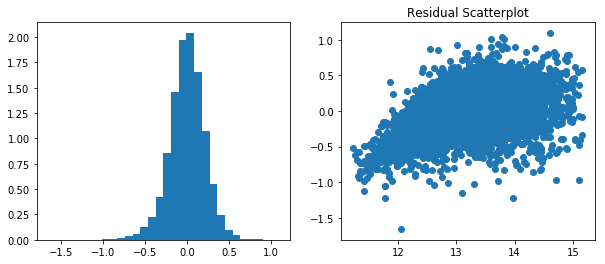

In [44]:
checkresiduals(df, 'price_log', scaled_features_zip_model)

## Time Aggregations:

Imagine this situation. 

You are trying to predict sales for a bar in Williamsburg that has an outdoor patio. You know that weather impacts the sales and want to include it in your features.  

Right now you have weather data at a hourly level, but your sales data is at a daily level. How should we aggregate/convert our hourly data into our daily data?

**EX:** For temperature, I believe that what is most important is how warm it got that day, so I take my hourly data and `resample`  it to give me the max for the day.  

```df['temp'].resample('D').max()```

### Question
Now let's think about this for rain.  Talk with your partner and come up with 3 ways that you can take hourly rain measurements and aggregate it up to a daily level. 

***Hint:*** The outdoor space is primarily used from 12-8pm.  